# Loading the dataset

In [599]:
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [600]:
dataset = pd.read_csv('url_dataset.csv')
dataset = dataset.drop_duplicates(keep='first')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,no_of_dots,specialSymbol,lengthOfURL,suspiciousWords,prefixSuffix,countOfHttp,shorteningService,has_data_uri,check_ssl_certificate,fake_login_form,...,missingHyperlink,count_foreign_links,count_empty_links,count_error_links,count_redirection_links,has_foreign_css,check_favicon,google_index,httpDomain,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1,0,0,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,0,0,1,0,0,0,0,1,0,1,...,1,1,1,1,1,1,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0,0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,0,0,1,0,0
320,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
321,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,1,0,0
322,1,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0


# Data Visualization

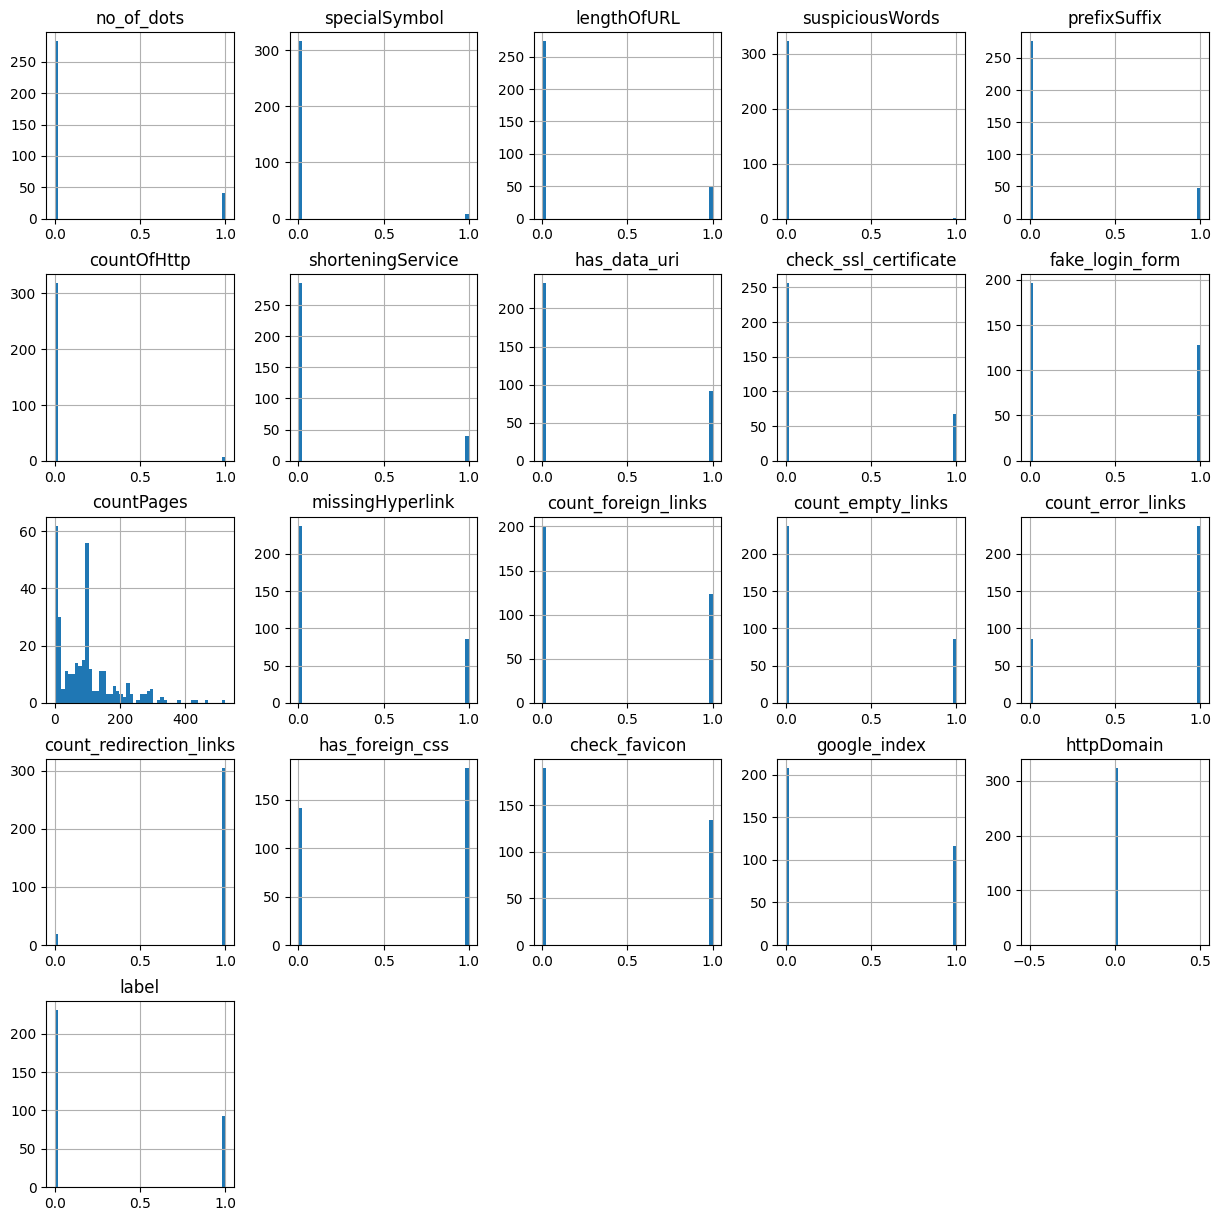

In [601]:
dataset.hist(bins = 50, figsize=(15,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

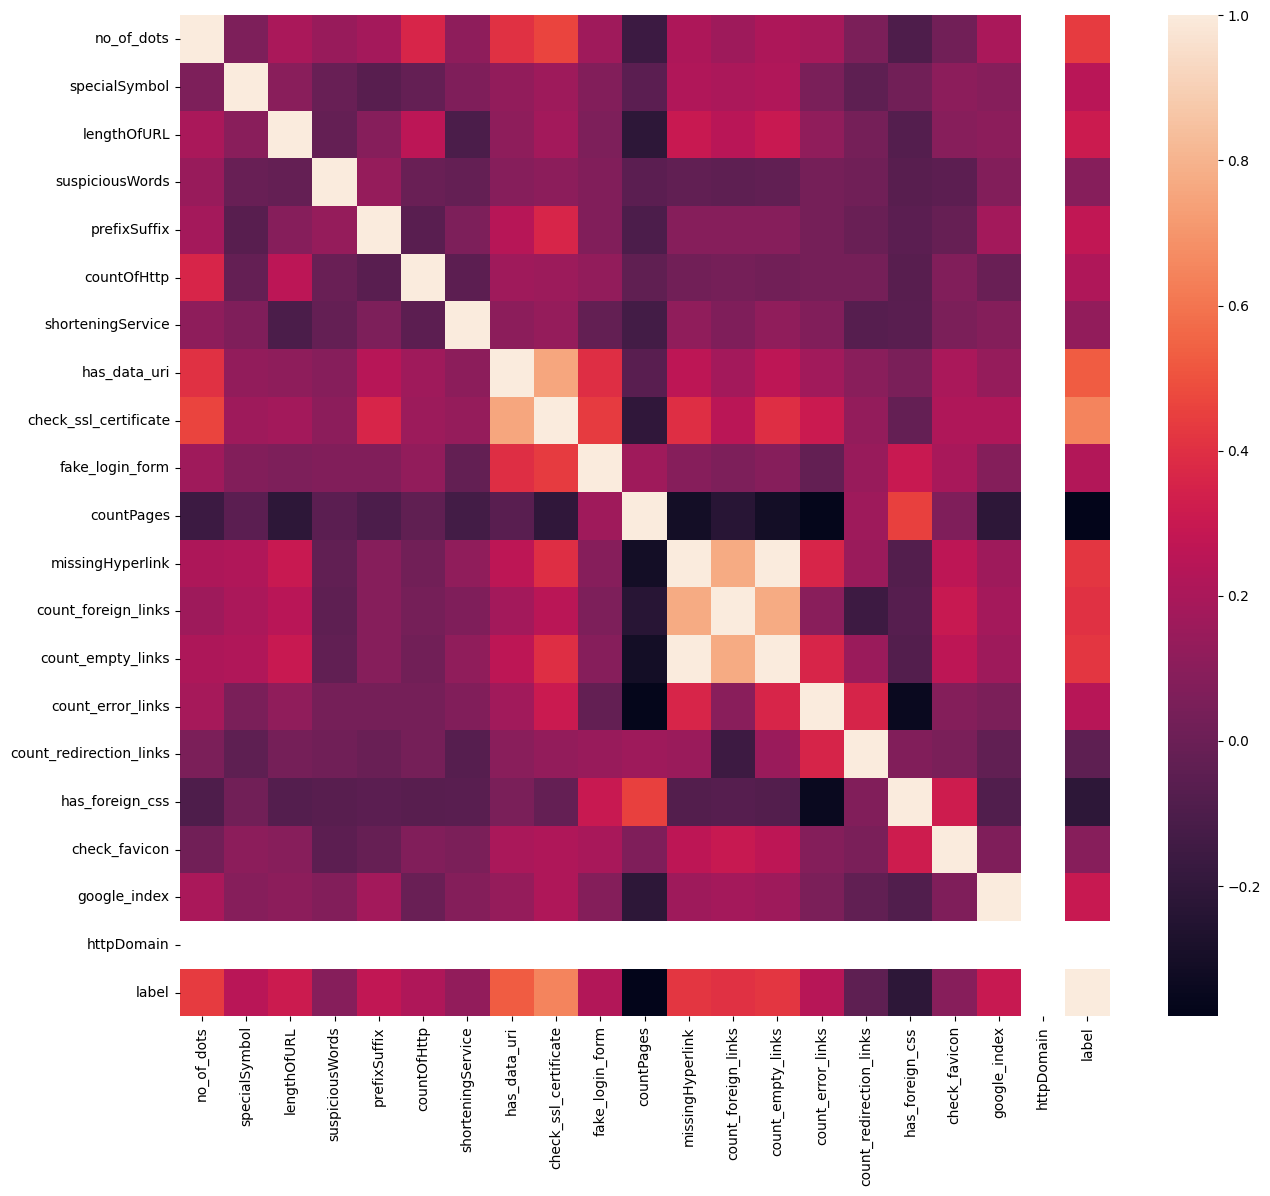

In [602]:
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show

# Preprocessing

In [603]:
# %pip install scikit-learn
from sklearn.model_selection import train_test_split

dataset = dataset.sample(frac=1).reset_index(drop=True)

X = dataset.drop('label', axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

# Models and Training

We will be using 4 Machine Learning models and 3 Deep Learning models to train the dataset.

- Decision Tree
- Random Forest Classifier
- Support Vector Machine
- K-nearest Neighbors
- Convolutional Neural Networks
- Reccurrent Neural Networks
- Long Short Term Memory

In [604]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [605]:
modelsUsed = []
accuracy = []
tpr = []
fpr = []

def store(model_name, tp, fp, acc):
    modelsUsed.append(model_name)
    tpr.append(round(tp, 3))
    fpr.append(round(fp, 3))
    accuracy.append(round(acc, 3))

## 1. Decision Tree

In [606]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [607]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

joblib.dump(tree, "./Frontend/prediction/tree.pkl")

Decision Tree: Accuracy on training Data: 0.929
Decision Tree: Accuracy on test Data: 0.837


['./Frontend/prediction/tree.pkl']

In [608]:
cm_tree = confusion_matrix(y_test, y_test_tree)

# Compute TPR, FPR, TNR, and FNR
TPR_tree = cm_tree[1, 1] / (cm_tree[1, 1] + cm_tree[1, 0])
FPR_tree = cm_tree[0, 1] / (cm_tree[0, 1] + cm_tree[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_tree))
print("False Positive Rate (FPR): {:.3f}".format(FPR_tree))

True Positive Rate (TPR): 0.818
False Positive Rate (FPR): 0.158


In [609]:
store("Decision Tree", TPR_tree, FPR_tree, acc_test_tree)

## 2. Random Forest Classifier

In [610]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [611]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

joblib.dump(forest, "./Frontend/prediction/forest.pkl")

Random forest: Accuracy on training Data: 0.907
Random forest: Accuracy on test Data: 0.786


['./Frontend/prediction/forest.pkl']

In [612]:
cm_forest = confusion_matrix(y_test, y_test_forest)

# Compute TPR, FPR, TNR, and FNR
TPR_forest = cm_forest[1, 1] / (cm_forest[1, 1] + cm_forest[1, 0])
FPR_forest = cm_forest[0, 1] / (cm_forest[0, 1] + cm_forest[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_forest))
print("False Positive Rate (FPR): {:.3f}".format(FPR_forest))

True Positive Rate (TPR): 0.818
False Positive Rate (FPR): 0.224


In [613]:
store("Random Forest Classifer", TPR_forest, FPR_forest, acc_test_forest)

## 3. Support Vector Machines (SVM)

In [614]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=15)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=15)

In [615]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

joblib.dump(svm, "./Frontend/prediction/svm.pkl")

SVM: Accuracy on training Data: 0.907
SVM : Accuracy on test Data: 0.776


['./Frontend/prediction/svm.pkl']

In [616]:
cm_svm = confusion_matrix(y_test, y_test_svm)

# Compute TPR, FPR, TNR, and FNR
TPR_svm = cm_svm[1, 1] / (cm_svm[1, 1] + cm_svm[1, 0])
FPR_svm = cm_svm[0, 1] / (cm_svm[0, 1] + cm_svm[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_svm))
print("False Positive Rate (FPR): {:.3f}".format(FPR_svm))

True Positive Rate (TPR): 0.864
False Positive Rate (FPR): 0.250


In [617]:
store("Support Vector Machines", TPR_svm, FPR_svm, acc_test_svm)

## 4. K-Nearest Neighbors (KNN)

In [618]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [619]:
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

joblib.dump(knn, "./Frontend/prediction/knn.pkl")

KNN: Accuracy on training Data: 0.916
KNN: Accuracy on test Data: 0.714


['./Frontend/prediction/knn.pkl']

In [620]:
cm_knn = confusion_matrix(y_test, y_test_knn)

# Compute TPR, FPR, TNR, and FNR
TPR_knn = cm_knn[1, 1] / (cm_knn[1, 1] + cm_knn[1, 0])
FPR_knn = cm_knn[0, 1] / (cm_knn[0, 1] + cm_knn[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_knn))
print("False Positive Rate (FPR): {:.3f}".format(FPR_knn))

True Positive Rate (TPR): 0.727
False Positive Rate (FPR): 0.289


In [621]:
store("K-Nearest Neighbors", TPR_knn, FPR_knn, acc_test_knn)

## 5. Convolutional Neural Networks (CNN)

In [622]:
# %pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models

cnn = models.Sequential()
cnn.add(layers.Reshape((20, 1), input_shape=(20,)))
cnn.add(layers.Conv1D(32, 3, activation='relu'))
cnn.add(layers.MaxPooling1D(2))
cnn.add(layers.Conv1D(64, 3, activation='relu'))
cnn.add(layers.MaxPooling1D(2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, acc_test_cnn = cnn.evaluate(X_test, y_test)
print("CNN: Accuracy on test Data: {:.3f}".format(acc_test_cnn))

joblib.dump(cnn, './Frontend/prediction/cnn.pkl')


Epoch 1/5
8/8 [==============================] - 1s 44ms/step - loss: 0.6997 - accuracy: 0.7124 - val_loss: 0.5687 - val_accuracy: 0.7245
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.8359 - accuracy: 0.7699 - val_loss: 1.2525 - val_accuracy: 0.2245
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.7080 - val_loss: 0.4408 - val_accuracy: 0.8061
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.5172 - accuracy: 0.7611 - val_loss: 0.3795 - val_accuracy: 0.8061
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8163
CNN: Accuracy on test Data: 0.816


['./Frontend/prediction/cnn.pkl']

In [623]:
y_pred_cnn = cnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes_cnn = np.round(y_pred_cnn)

# Compute the confusion matrix
cm_cnn = confusion_matrix(y_true=y_test, y_pred=y_pred_classes_cnn)

TPR_cnn = cm_cnn[1, 1] / (cm_cnn[1, 1] + cm_cnn[1, 0])
FPR_cnn = cm_cnn[0, 1] / (cm_cnn[0, 1] + cm_cnn[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_cnn))
print("False Positive Rate (FPR): {:.3f}".format(FPR_cnn))

4/4 [==============================] - 0s 2ms/step
True Positive Rate (TPR): 0.727
False Positive Rate (FPR): 0.158


In [624]:
store("Convolutional Neural Networks", TPR_cnn, FPR_cnn, acc_test_cnn)

## 6. Recurrent Neural Networks (RNN)

In [625]:
rnn = models.Sequential()
rnn.add(layers.SimpleRNN(32, input_shape=(20, 1)))
rnn.add(layers.Dense(64, activation='relu'))
rnn.add(layers.Dense(1, activation='sigmoid'))

rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = rnn.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

y_test_rnn = rnn.predict(X_test)

test_loss, acc_test_rnn = rnn.evaluate(X_test, y_test)
print("RNN: Accuracy on test Data: {:.3f}".format(acc_test_rnn))

joblib.dump(rnn, './Frontend/prediction/rnn.pkl')

Epoch 1/5
8/8 [==============================] - 1s 35ms/step - loss: 0.6442 - accuracy: 0.6858 - val_loss: 0.5480 - val_accuracy: 0.7755
Epoch 2/5
8/8 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.6858 - val_loss: 0.5338 - val_accuracy: 0.7755
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.5611 - accuracy: 0.6903 - val_loss: 0.5180 - val_accuracy: 0.7143
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 0.7257 - val_loss: 0.5051 - val_accuracy: 0.7245
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7449
RNN: Accuracy on test Data: 0.745


['./Frontend/prediction/rnn.pkl']

In [626]:
y_pred_rnn = rnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes_rnn = np.round(y_pred_rnn)

# Compute the confusion matrix
cm_rnn = confusion_matrix(y_true=y_test, y_pred=y_pred_classes_rnn)

TPR_rnn = cm_rnn[1, 1] / (cm_rnn[1, 1] + cm_rnn[1, 0])
FPR_rnn = cm_rnn[0, 1] / (cm_rnn[0, 1] + cm_rnn[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_rnn))
print("False Positive Rate (FPR): {:.3f}".format(FPR_rnn))

4/4 [==============================] - 0s 1ms/step
True Positive Rate (TPR): 0.227
False Positive Rate (FPR): 0.105


In [627]:
store("Recurrent Neural Networks", TPR_rnn, FPR_rnn, acc_test_rnn)

## 7. Long Short Term Memory (LSTM)

In [628]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
lstm = models.Sequential()
lstm.add(layers.LSTM(32, input_shape=(20, 1)))
lstm.add(layers.Dense(64, activation='relu'))
lstm.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = lstm.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

y_test_lstm = lstm.predict(X_test)

test_loss, acc_test_lstm = lstm.evaluate(X_test, y_test)
print("LSTM: Accuracy on test Data: {:.3f}".format(acc_test_lstm))

joblib.dump(lstm, './Frontend/prediction/lstm.pkl')

Epoch 1/5
8/8 [==============================] - 3s 67ms/step - loss: 0.6728 - accuracy: 0.6858 - val_loss: 0.6226 - val_accuracy: 0.7755
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: 0.6390 - accuracy: 0.6858 - val_loss: 0.5812 - val_accuracy: 0.7755
Epoch 3/5
8/8 [==============================] - 0s 11ms/step - loss: 0.6170 - accuracy: 0.6858 - val_loss: 0.5652 - val_accuracy: 0.7755
Epoch 4/5
8/8 [==============================] - 0s 13ms/step - loss: 0.5976 - accuracy: 0.6858 - val_loss: 0.5310 - val_accuracy: 0.7755
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7755
LSTM: Accuracy on test Data: 0.776


['./Frontend/prediction/lstm.pkl']

In [629]:
y_pred_lstm = lstm.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes_lstm = np.round(y_pred_lstm)

# Compute the confusion matrix
cm_lstm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes_lstm)

TPR_lstm = cm_lstm[1, 1] / (cm_lstm[1, 1] + cm_lstm[1, 0])
FPR_lstm = cm_lstm[0, 1] / (cm_lstm[0, 1] + cm_lstm[0, 0])

print("True Positive Rate (TPR): {:.3f}".format(TPR_lstm))
print("False Positive Rate (FPR): {:.3f}".format(FPR_lstm))

4/4 [==============================] - 0s 2ms/step
True Positive Rate (TPR): 0.000
False Positive Rate (FPR): 0.000


In [630]:
store("Long Short Term Memory", TPR_lstm, FPR_lstm, acc_test_lstm)

# Comparing Different Models

In [631]:
results = pd.DataFrame({'Model' : modelsUsed,
                        'Accuracy' : accuracy,
                        'TPR' : tpr,
                        'FPR' : fpr})

results

,Model,Accuracy,TPR,FPR
0,Decision Tree,0.837,0.818,0.158
1,Random Forest Classifer,0.786,0.818,0.224
2,Support Vector Machines,0.776,0.864,0.250
3,K-Nearest Neighbors,0.714,0.727,0.289
4,Convolutional Neural Networks,0.816,0.727,0.158
5,Recurrent Neural Networks,0.745,0.227,0.105
6,Long Short Term Memory,0.776,0.000,0.000
